In [1]:
import os
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

from numpy import asarray
from numpy import save
from numpy import load

import pickle
import random

In [2]:
with open("StrToNum.txt", "rb") as myFile:
    StrToNum = pickle.load(myFile)
with open("NumToStr.txt", "rb") as myFile:
    NumToStr = pickle.load(myFile)

In [3]:
# load numpy array from npy file
from numpy import load
# load array
trainData = load('finalTrainImgData.npy')
trainLabels = load('finalTrainClassName.npy')
# print the array
print(trainData.shape)
print(trainLabels.shape)
print(np.unique(trainLabels))

(78200, 32, 32)
(78200,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [4]:
%matplotlib notebook   

<IPython.core.display.Javascript object>


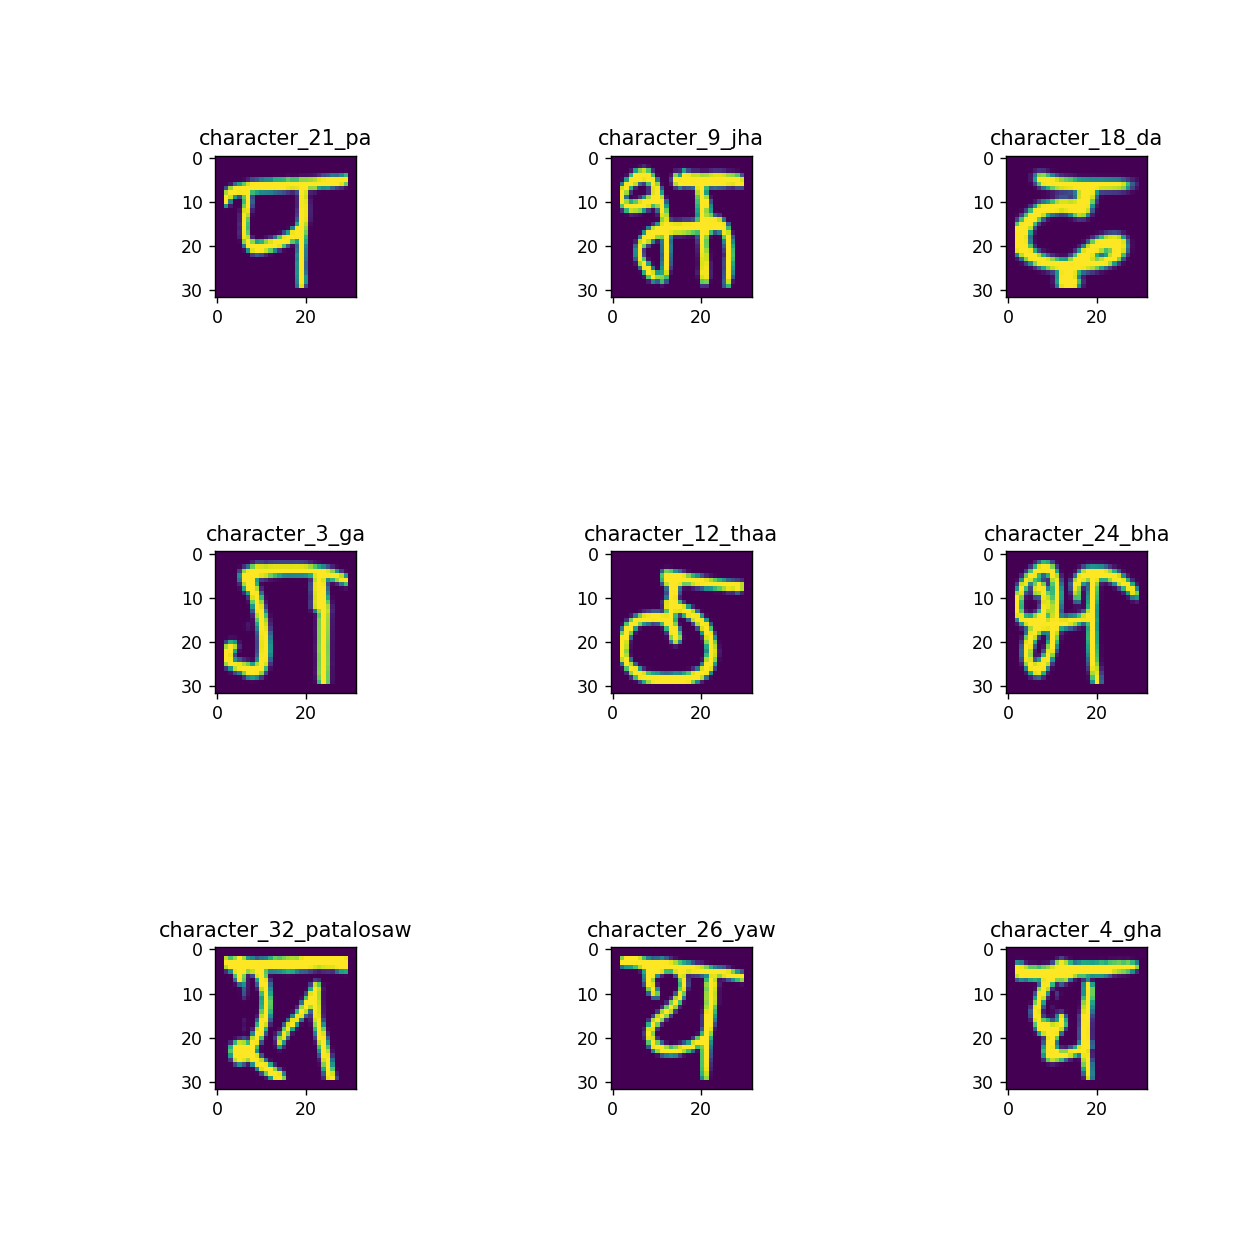

In [5]:
fig=plt.figure(figsize=(3,3))
for i in range(9):
    r=random.randint(0, 70000)
    plt.subplot(331+i)
    plt.imshow(trainData[r])
    plt.gca().set_title(NumToStr[trainLabels[r]])
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(8)

In [6]:
# load numpy array from npy file
from numpy import load
# load array
testData = load('finalTestImgData.npy')
testLabels = load('finalTestClassName.npy')
# print the array
print(testData.shape)
print(testLabels.shape)
print(np.unique(testLabels))

(13800, 32, 32)
(13800,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


<IPython.core.display.Javascript object>


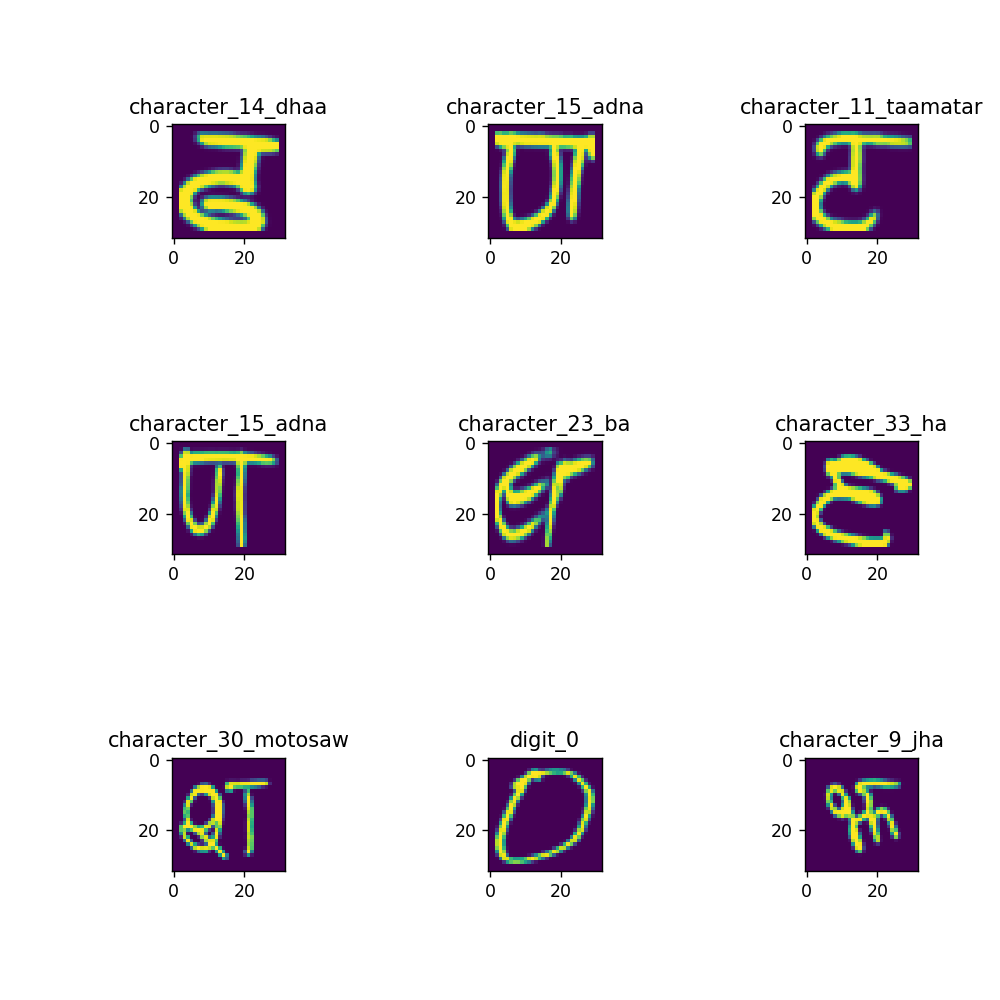

In [7]:
%matplotlib notebook       
fig=plt.figure(figsize=(3,3))
for i in range(9):
    r=random.randint(0, 13800)
    plt.subplot(331+i)
    plt.imshow(testData[r])
    plt.gca().set_title(NumToStr[testLabels[r]])
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(8)

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(32,32)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(46, activation=tf.nn.softmax)])

In [9]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(trainData, trainLabels , epochs=3)


Epoch 1/3
2444/2444 [==============================] - 6s 2ms/step - loss: 0.9870 - accuracy: 0.7187
Epoch 2/3
2444/2444 [==============================] - 6s 2ms/step - loss: 0.4438 - accuracy: 0.8664
Epoch 3/3
2444/2444 [==============================] - 5s 2ms/step - loss: 0.3375 - accuracy: 0.8966


In [11]:
print(model.evaluate(trainData,trainLabels))

2444/2444 [==============================] - 5s 2ms/step - loss: 0.2655 - accuracy: 0.9176
[0.2655077278614044, 0.9175831079483032]


In [12]:
print(model.evaluate(testData,testLabels))

432/432 [==============================] - 1s 2ms/step - loss: 0.3710 - accuracy: 0.8919
[0.37098005414009094, 0.8918840289115906]


In [19]:
randomImgPath='D:\SOFTWARES\Jupyter\\p11.jpeg'

<class 'PIL.Image.Image'>
(32, 32)
<class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


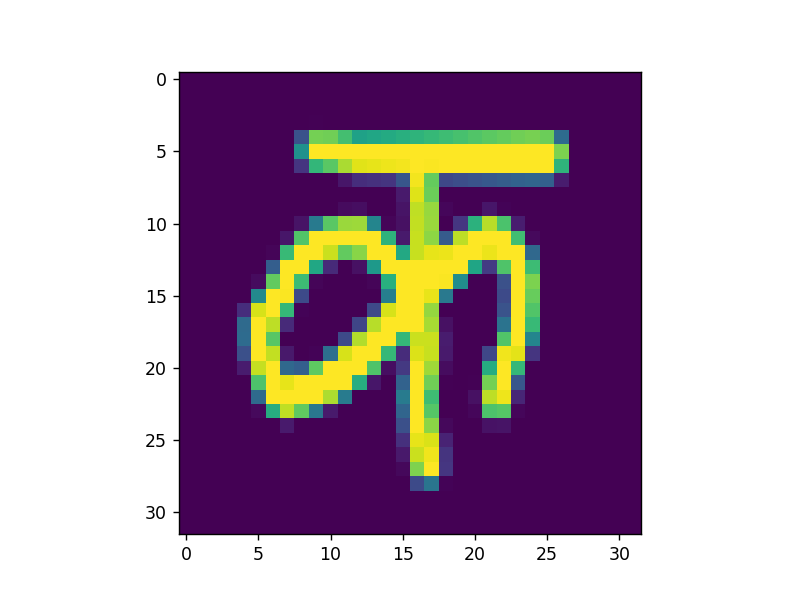

(78200, 32, 32)
(1, 32, 32)
character_30_motosaw


In [20]:
randomImg = Image.open(randomImgPath)

randomImg = randomImg.convert('L')


randomImg = randomImg.resize((32,32))
print(type(randomImg))

randomImg= np.array(randomImg)
randomImg= np.resize(randomImg,(32,32))
randomImg = randomImg.astype('float32')
randomImg /= 255  


print(randomImg.shape)

ip=np.resize(randomImg,(1,32,32))
# ip=testData[2:10]
print(type(ip))

plt.figure()

plt.subplot(111)
plt.imshow(ip[0])

print(trainData.shape)
print(ip.shape)
prediction = model.predict(ip)
print(NumToStr[np.argmax(prediction[0])])

